# Timeseries  
: 시계열 데이터, 시계 즉 시간이 열이고 값이 행인 데이터  
ex) 주가 차트

In [1]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def build_dataset(time_series, seq_length):
  dataX = []
  dataY = []
  for i in range(0, len(time_series) - seq_length):
    x_ = time_series[i:i+seq_length :]
    y_ = time_series[i+seq_length, -1]
    print(x_, '->', y_)
    dataX.append(x_)
    dataY.append(y_)
  return np.array(dataX), np.array(dataY)

In [3]:
seq_length = 7
input_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500


In [4]:
path = "/content/drive/MyDrive/ml-data/data-stock-daily/google-stock-data.txt"

In [5]:
xy = np.loadtxt(path, delimiter=",")[::-1]

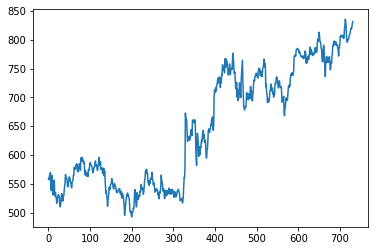

In [6]:
import matplotlib.pyplot as plt

plt.plot(xy[:,-1])

In [7]:
from sklearn.preprocessing import MinMaxScaler
xy_scaled = MinMaxScaler().fit_transform(xy)

In [8]:
train_size = int(len(xy_scaled) * 0.7)
train_set = xy_scaled[0:train_size]
test_set = xy_scaled[train_size - seq_length:]

trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY).view(-1, 1)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY).view(-1, 1)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0.15782902 0.15470702 0.12791016 0.60962624 0.12692483]
 [0.1207904  0.11770961 0.11162416 0.22934481 0.10512477]] -> 0.12316525956174385
[[0.11044525 0.12724798 0.11435324 0.35107108 0.11089532]
 [0.12705592 0.1390988  0.12324434 0.23008873 0.11649107]
 [0.12288872 0.12276776 0.09067269 0.34481491 0.12791587]
 [0.14089803 0.17638508 0.15387945 0.4378686  0.18649648]
 [0.15782902 0.15470702 0.12791016 0.60962624 0.12692483]
 [0.1207904  0.11770961 0.11162416 0.22934481 0.10512477]
 [0.09905103 0.11924158 0.11722888 0.21129336 0.12316526]] -> 0.10022842770847795
[[0.12705592 0.1390988  0.12324434 0.23008873 0.11649107]
 [0.12288872 0.12276776 0.09067269 0.34481491 0.12791587]
 [0.14089803 0.17638508 0.15387945 0.4378686  0.18649648]
 [0.15782902 0.15470702 0.12791016 0.60962624 0.12692483]
 [0.1207904  0.11770961 0.11162416 0.22934481 0.10512477]
 [0.09905103 0.11924158 0.11722888 0.21129336 0.12316526]
 [0.11405885 0.10952968 0.11353161 0.18323922 

In [14]:
class CustomRNN(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim, layers=1):
    super(CustomRNN, self).__init__()
    self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
    self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)
  
  def forward(self, x):
    x, _status = self.rnn(x)
    x = self.fc(x[:, -1])
    return x

model = CustomRNN(input_dim, hidden_dim, output_dim, layers=1)

In [15]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [16]:
trainY_tensor = trainY_tensor.view(-1, 1)

In [17]:
for i in range(iterations):
  optimizer.zero_grad()
  outputs = model(trainX_tensor)
  break
  loss = criterion(outputs, trainY_tensor)
  loss.backward()
  optimizer.step()
  print(f"{i} - {loss.item()}")

torch.Size([505, 7, 10])
torch.Size([505, 10])


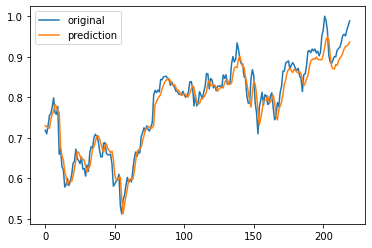

In [13]:
plt.plot(testY)
plt.plot(model(testX_tensor).data.numpy())
plt.legend(["original", "prediction"])
plt.show()